Columns in the dataset:
Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

Sample data:
       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3   

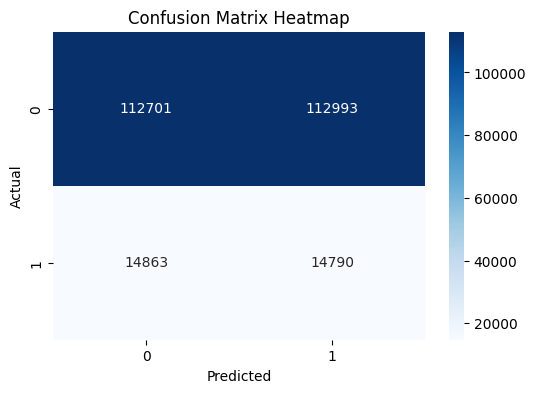

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


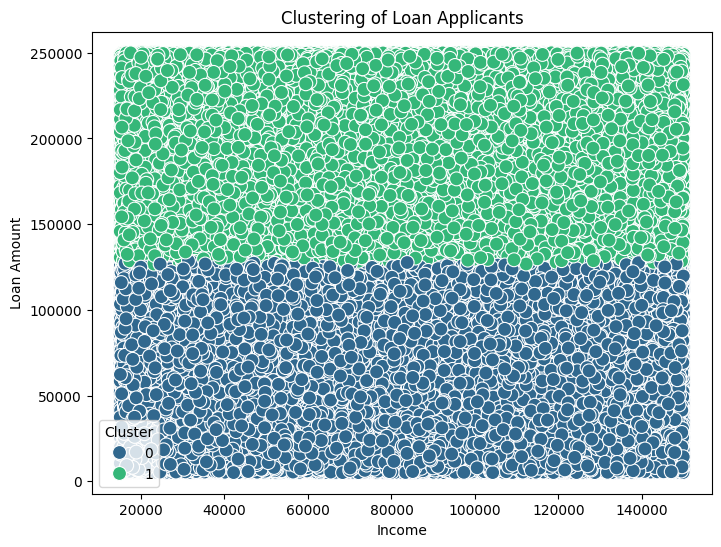

In [17]:
# Install required libraries (if not already installed)
!pip install pandas scikit-learn seaborn matplotlib --quiet

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv('/content/1. Predict Loan Default.csv')

# Preview the dataset to check columns
print("Columns in the dataset:")
print(data.columns)

# Display the first few rows
print("\nSample data:")
print(data.head())

# Use 'Default' as the actual labels
actual_labels = data['Default']

# Generate random predictions (0 or 1) for demonstration purposes
np.random.seed(42)  # for reproducibility
data['PredictedDefault'] = np.random.randint(0, 2, size=len(data))

# Use the generated predictions
predicted_labels = data['PredictedDefault']

# Accuracy and Precision
accuracy = accuracy_score(actual_labels, predicted_labels)
precision = precision_score(actual_labels, predicted_labels)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")

# Create the confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Step for clustering graph - Using KMeans for clustering predictions vs. actual labels
# Preprocess the data for clustering (just for visual purposes here)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Income', 'LoanAmount', 'CreditScore']])  # Sample numeric columns

# Perform KMeans clustering (assuming 2 clusters for visualization)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Adding the cluster labels to the data for visualization
data['Cluster'] = clusters

# Scatter plot to visualize the clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['Income'], y=data['LoanAmount'], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Clustering of Loan Applicants')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()